In [1]:
import pyreadstat as prs
raw_df, meta = prs.read_sas7bdat("dat\WVS_TimeSeries_4_0.sas7bdat")

In [6]:
# Get the dimensions of the data
shape = raw_df.shape
print(shape)

# Get the column names
columns = raw_df.columns
print(columns)

# Get the first few rows of the data
head = raw_df.head()
print(head)

# Get the last few rows of the data
tail = raw_df.tail()
print(tail)

(450869, 1045)
Index(['version', 'doi', 'S002VS', 'S003', 'COUNTRY_ALPHA', 'COW_NUM',
       'COW_ALPHA', 'S004', 'S006', 'S007',
       ...
       'Y023A', 'Y023B', 'Y023C', 'Y024A', 'Y024B', 'Y024C', 'survself',
       'tradrat5', 'TradAgg', 'SurvSAgg'],
      dtype='object', length=1045)
  version                    doi  S002VS  S003 COUNTRY_ALPHA  COW_NUM  \
0   4-0-0  doi:10.14281/18241.22     4.0   8.0           ALB    339.0   
1   4-0-0  doi:10.14281/18241.22     4.0   8.0           ALB    339.0   
2   4-0-0  doi:10.14281/18241.22     4.0   8.0           ALB    339.0   
3   4-0-0  doi:10.14281/18241.22     4.0   8.0           ALB    339.0   
4   4-0-0  doi:10.14281/18241.22     4.0   8.0           ALB    339.0   

  COW_ALPHA  S004  S006        S007  ...     Y023A  Y023B     Y023C  Y024A  \
0       ALB  -4.0   1.0  80420001.0  ...       NaN    NaN  0.000000    NaN   
1       ALB  -4.0   2.0  80420002.0  ...  0.000000    0.0  0.000000    NaN   
2       ALB  -4.0   3.0  80420003.0

In [50]:
import pandas as pd
# Print the countries in the data
# countries = raw_df['COUNTRY_ALPHA'].unique()
# print(countries)

# Print rows where COUNTY_ALPHA is 'AUS' and S002VS is 7.0
aus_wave7 = raw_df[(raw_df['COUNTRY_ALPHA'] == 'AUS') & (raw_df['S002VS'] == 7.0)]

# Print the 500th row of the AUS data
aus_wave7_person = aus_wave7.iloc[499]
print(aus_wave7_person)

# Extract this column as a list
aus_wave7_person_vec = aus_wave7_person.tolist()

# Remove any non-numeric values, like strings
aus_wave7_person_vec = [x for x in aus_wave7_person_vec if not isinstance(x, str)]

print(aus_wave7_person_vec)


version                          4-0-0
doi              doi:10.14281/18241.22
S002VS                             7.0
S003                              36.0
COUNTRY_ALPHA                      AUS
                         ...          
Y024C                              1.0
survself                      1.012891
tradrat5                      1.385114
TradAgg                       2.130033
SurvSAgg                      1.871332
Name: 23566, Length: 1045, dtype: object
[7.0, 36.0, 900.0, -4.0, 36070498.0, 36720500.0, -3.0, 4.0, -3.0, -3.0, -3.0, 20180413.0, 2.0, -4.0, 128.0, 1240.0, 0.249013, 0.551572, 2018.0, 3607212018.0, 201804.0, 201808.0, 367.0, 362018.0, 1.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, 1.0, -4.0, -4.0, 1.0, 1.0, 1.0, 0.0, 1.0, -4.0, 0.0, -4.0, 1.0, -4.0, -4.0, 1.0, -4.0, 0.0, 0.0,

In [109]:
# Now we will extract all rows in aus_wave7, putting them in a matrix as its columns
aus_wave7_matrix = aus_wave7.values

# Again we will remove any non-numeric values
aus_wave7_matrix = [[x for x in row if not isinstance(x, str)] for row in aus_wave7_matrix]

# Remove any row with all values negative
aus_wave7_matrix = [row for row in aus_wave7_matrix if any(x > 0 for x in row)]

# Transpose the list
aus_wave7_matrix = list(map(list, zip(*aus_wave7_matrix)))

# Remove any row with all values equal
aus_wave7_matrix = [row for row in aus_wave7_matrix if len(set(row)) > 1]

# Print dims of the matrix
print(len(aus_wave7_matrix))
print(len(aus_wave7_matrix[0]))

# Find the cluster of the matrix
aus_wave7_cluster = pdist(aus_wave7_matrix, 'euclidean')
print(aus_wave7_cluster)



359
1813


(1813, 3)


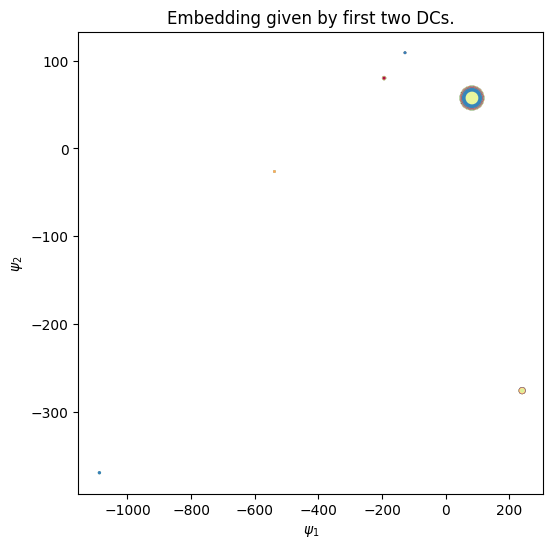

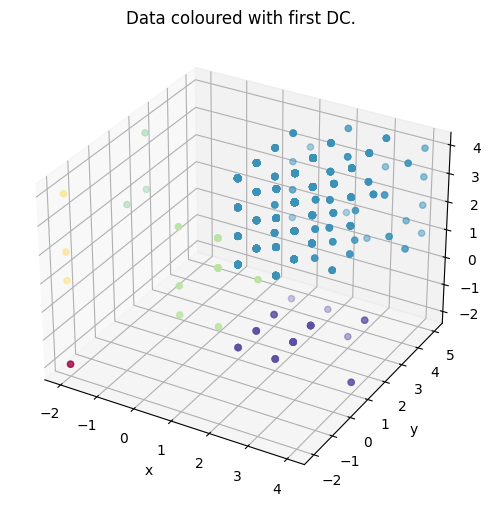

In [153]:
# import some necessary functions for plotting as well as the diffusion_map class from pydiffmap.
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from pydiffmap import diffusion_map as dm

%matplotlib inline


# set parameters
length_phi = 15   #length of swiss roll in angular direction
length_Z = 15     #length of swiss roll in z direction
sigma = 0.1       #noise strength
m = 1813         #number of samples

# create dataset
phi = length_phi*np.random.rand(m)
# xi = np.random.rand(m)
# Z = length_Z*np.random.rand(m)
# X = 1./6*(phi + sigma*xi)*np.sin(phi)
# Y = 1./6*(phi + sigma*xi)*np.cos(phi)

m = 1813         #number of samples
Z = aus_wave7_matrix[10]
X = aus_wave7_matrix[11]
Y = aus_wave7_matrix[12]

# J = aus_wave7_matrix[3]

swiss_roll = np.array([X, Y, Z]).transpose()

# check that we have the right shape
print(swiss_roll.shape)

# initialize Diffusion map object.
neighbor_params = {'n_jobs': -1, 'algorithm': 'ball_tree'}

mydmap = dm.DiffusionMap.from_sklearn(n_evecs=2, k=200, epsilon='bgh', alpha=1.0, neighbor_params=neighbor_params)
# fit to data and return the diffusion map.
dmap = mydmap.fit_transform(swiss_roll)

from pydiffmap.visualization import embedding_plot, data_plot

embedding_plot(mydmap, scatter_kwargs = {'c': phi, 's': mydmap.q, 'cmap': 'Spectral'})
data_plot(mydmap, dim=3, scatter_kwargs = {'cmap': 'Spectral'})
plt.show()
